In [29]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v2
from IPython.display import clear_output

In [4]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v2.GridWorld_v2(forbiddenAreaScore=-5000, score=100,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))] 
gridworld.showPolicy(policy)

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️
🔄⬇️⬅️⬅️⬇️
🔄🔄🔄⬆️⬅️
⬅️⬆️⏩️⬆️⬇️
⬇️⏩️✅🔄⬇️
⬆️🔄➡️⬆️⬆️


In [5]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = random.randint(0,24),action = random.randint(0,4),policy = policy,steps = 500) 
            for i in range(500)]

In [23]:
state_value = np.random.randn(25)
learning_rate = 0.01
gamma = 0.99
for i in range(500):
    for trajectory in episodes[i]:
        tmpstate, tmpaction, tmpscore, nextState, nextAction = trajectory
        TD_error = state_value[tmpstate] - (tmpscore + gamma * state_value[nextState])
        state_value[tmpstate] = state_value[tmpstate] - learning_rate * TD_error

In [24]:
state_value = np.round(state_value,decimals=3).reshape(5,5)

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

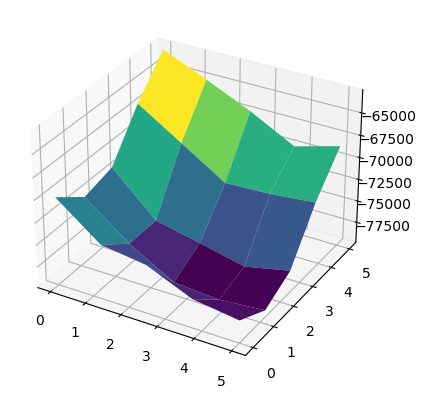

In [26]:
x = np.linspace(0,5,5)
y = np.linspace(0,5,5)

X, Y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(Y,X,state_value, cmap='viridis')

===================下面用TD拟合state value 进而得到action value 从而更新策略 ====================

In [32]:
gamma = 0.999   #折扣因子，越接近0越近视
trajectorySteps = 20000
learning_rate = 0.01
num_episodes = 60000

In [33]:
policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))] 
state_value = np.zeros((rows * columns))
qtable = np.zeros((rows * columns,5))

In [34]:
gridworld.show()
gridworld.showPolicy(policy)
print("random policy")

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️
➡️⬆️⬇️➡️⬆️
⬇️⏪⏩️➡️⬇️
⬇️🔄⏬⬇️⬅️
➡️⏬✅🔄⬆️
⬆️⏫️⬅️🔄➡️
random policy


In [ ]:
#通过采样的方法计算action value，model free的话意味着不知道整个gridworld的概率了，所以不能直接套贝尔曼方程迭代求解

epsilon = 1
for episode in range(num_episodes):
    if(epsilon > 0.0001) :
        epsilon -= 0.0001
    else:
        epsilon = 0.0001
        
    p1 = 1-epsilon * (4/5)
    p0 = epsilon/5
    print(f"epision:{epsilon}, p1:{p1}, p0:{p0}")
    
    d = {1:p1, 0:p0}
    policy_epsilon = np.vectorize(d.get)(policy)
    
    i = random.randint(0,24)
    j = random.randint(0,4)
    
    cnt = [0 for i in range(25)]
    
    Trajectory = gridworld.getTrajectoryScore(nowState=i, action=j, policy=policy_epsilon, steps=trajectorySteps, stop_when_reach_target=True)
    print("trajectorySteps",len(Trajectory))
    
    Trajectory.append((17,4,1,17,4)) #让他最后自转一下
    
    if(len(Trajectory)>5000):
        continue
    clear_output(wait=True)
    state_value[17] = 100
    # 注意这里的返回值是大小为(trajectorySteps+1)的元组列表，因为把第一个动作也加入进去了
    steps = len(Trajectory) - 1
    for k in range(steps,-1,-1):
        tmpstate, tmpaction, tmpscore, nextState, nextAction = Trajectory[k]
        cnt[tmpstate] += 1
        TD_error = state_value[tmpstate] - (tmpscore + gamma * state_value[nextState])
        state_value[tmpstate] = state_value[tmpstate] - learning_rate * TD_error
        
    print(np.array(cnt).reshape(5,5))
    for i in range(rows * columns):
        for j in range(5):
            score,nextState = gridworld.getScore(i,j) 
            qtable[i][j] = score + gamma * state_value[nextState]

    print(state_value.reshape(5,5))
    gridworld.showPolicy(policy)
    print(np.array(state_value).mean())
        
    policy = np.eye(5)[np.argmax(qtable,axis=1)]  #qtable的最优值作为更新策略，并用独热码来表示
    policy_epsilon = np.vectorize(d.get)(policy)

    # break
    # print(np.array(cnt).reshape(5,5))


    


    

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 2 0 0]
 [0 0 2 0 0]
 [0 0 0 0 0]]
[[-11076.27616997  -9611.49033301  -4919.81926538  -2244.9266341
   -1173.796982  ]
 [ -8155.77649305 -10259.11150251  -7514.3565796   -2738.37887364
    -665.21202057]
 [ -6283.18161769  -7118.82340797  -3622.89834351  -3032.43138152
    -417.19231528]
 [ -5545.90455548   -452.49469554    101.00799991   -711.90362457
    -616.90429877]
 [ -6851.12160163  -2195.88104397   -265.25046969   -185.48246331
    -181.30724347]]
⬇️➡️➡️➡️⬇️
⬇️⏬⏩️➡️⬇️
⬇️⬇️⏬➡️🔄
➡️⏩️✅⏪⬇️
⬆️⏩️⬆️➡️🔄
-3829.556556652939
epision:0.0001, p1:0.99992, p0:2e-05


In [46]:
policy

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])